# ***Instacart Dataset - Analysis***


---



---





In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***Importing packages***

---



---





In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


***Reading CSV's in Pandas***

1. aisles
1. departments
1. products
1. orders
1. order_products__prior.csv
1. order_products__train.csv 

---



---





In [0]:
aisles_df = pd.read_csv("/content/drive/My Drive/Datasets/aisles.csv", index_col=0)
aisles_df.head()

,aisle
aisle_id,
1,prepared soups salads
2,specialty cheeses
3,energy granola bars
4,instant foods
5,marinades meat preparation


In [0]:
departments_df = pd.read_csv("/content/drive/My Drive/Datasets/departments.csv", index_col=0)
departments_df.head()

,department
department_id,
1,frozen
2,other
3,bakery
4,produce
5,alcohol


In [0]:
order_products_prior_df = pd.read_csv("/content/drive/My Drive/Datasets/order_products__prior.csv", index_col=0)
order_products_prior_df.head()

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,product_id,add_to_cart_order,reordered
order_id,,,
2,33120,1,1
2,28985,2,1
2,9327,3,0
2,45918,4,1
2,30035,5,0


In [0]:
order_products_train_df = pd.read_csv("/content/drive/My Drive/Datasets/order_products__train.csv", index_col=0)
order_products_train_df.head()

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,product_id,add_to_cart_order,reordered
order_id,,,
1,49302,1,1
1,11109,2,1
1,10246,3,0
1,49683,4,0
1,43633,5,1


In [0]:
orders_df = pd.read_csv("/content/drive/My Drive/Datasets/orders.csv", index_col=0)
orders_df.head()

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
order_id,,,,,,
2539329,1,prior,1,2,8,NaN
2398795,1,prior,2,3,7,15.0
473747,1,prior,3,3,12,21.0
2254736,1,prior,4,4,7,29.0
431534,1,prior,5,4,15,28.0


In [0]:
products_df = pd.read_csv("/content/drive/My Drive/Datasets/products.csv", index_col=0)
products_df.head()

,product_name,aisle_id,department_id
product_id,,,
1,Chocolate Sandwich Cookies,61,19
2,All-Seasons Salt,104,13
3,Robust Golden Unsweetened Oolong Tea,94,7
4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
5,Green Chile Anytime Sauce,5,13


**There is a column in orders.csv file called as evel_set which tells us as to which of the datasets ( prior, train or test) the given rows belongs to. Let us get the count of rows in each of the three sets.**


---




**Eval Set Count**

In [0]:
def get_unique_count_eval_set(x):
    return len(np.unique(x))

Count_eval_set= orders_df.groupby("eval_set")["user_id"].aggregate(get_unique_count_eval_set)
Count_eval_set

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

***So there are 206,209 customers in total.*** 
***Out of which, the last purchase of 131,209 customers are given as train set and we need to predict for the rest 75,000 customers***

**Number of Products in the given order**



---



---



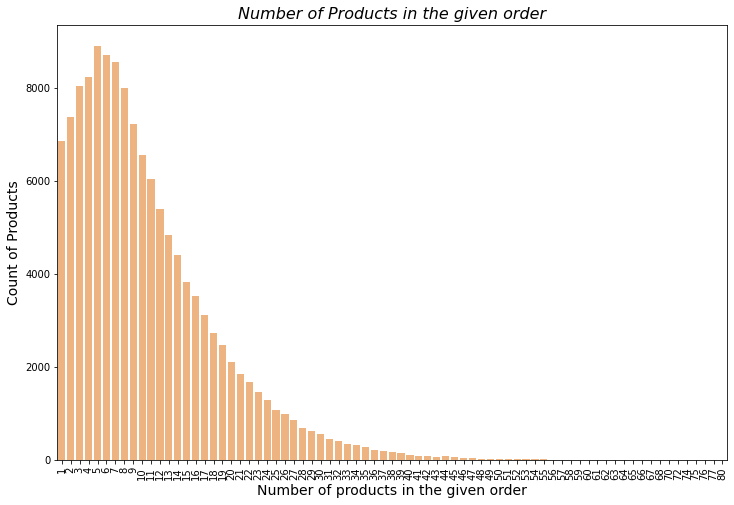

In [0]:
No_of_Products_df = order_products_train_df.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
cnt_srs = No_of_Products_df.add_to_cart_order.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.6, color=color[1] )
plt.ylabel('Count of Products', fontsize=14)
plt.xlabel('Number of products in the given order', fontsize=14)
plt.title('Number of Products in the given order', fontstyle='italic', fontsize=16)
plt.xticks(rotation='vertical')
plt.show()

**There are maximum products for 'order_id' 5.**


---



---



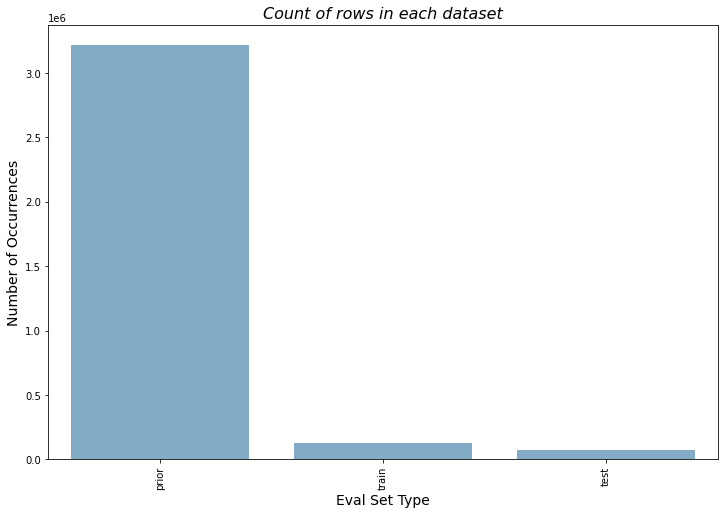

In [0]:
count_rows = orders_df.eval_set.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(count_rows.index, count_rows.values, alpha=0.6, color=color[0])
plt.ylabel('Number of Occurrences', fontsize=14)
plt.xlabel('Eval Set Type', fontsize=14)
plt.title('Count of rows in each dataset', fontsize=16, fontstyle='italic')
plt.xticks(rotation='vertical')
plt.show()

**Now let us merge these four files viz products, aisles, departments and order_products_prior for further analysis**

In [0]:
order_products_prior_df = pd.merge(order_products_prior_df, products_df, on='product_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, aisles_df, on='aisle_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, departments_df, on='department_id', how='left')
order_products_prior_df.head()

,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [0]:
Count_Products_df = order_products_prior_df['product_name'].value_counts().reset_index().head(20)
Count_Products_df.columns = ['product_name', 'Count_of_Products']
Count_Products_df

,product_name,Count_of_Products
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


**Most of them are organic products majority of them being fruits.**
***Most sold product is Banana***

---



---



***Count of Products in each Aisle***


---



---



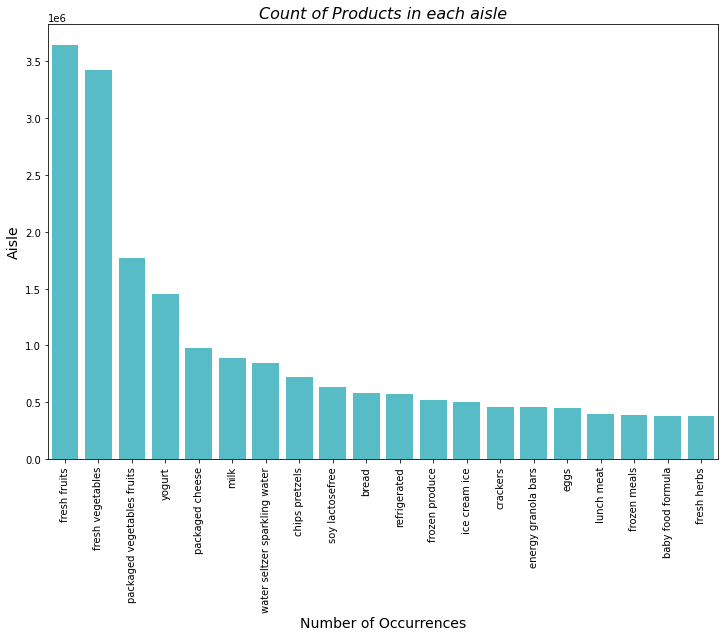

In [0]:
Count_Products = order_products_prior_df['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(Count_Products.index, Count_Products.values, alpha=0.8, color=color[9])
plt.ylabel('Aisle', fontsize=14)
plt.xlabel('Number of Occurrences', fontsize=14)
plt.title('Count of Products in each aisle', fontsize=16, fontstyle='italic')
plt.xticks(rotation='vertical')
plt.show()

**The top two aisles are fresh fruits and fresh vegetables.**

***Maximum Order Number***


---



---



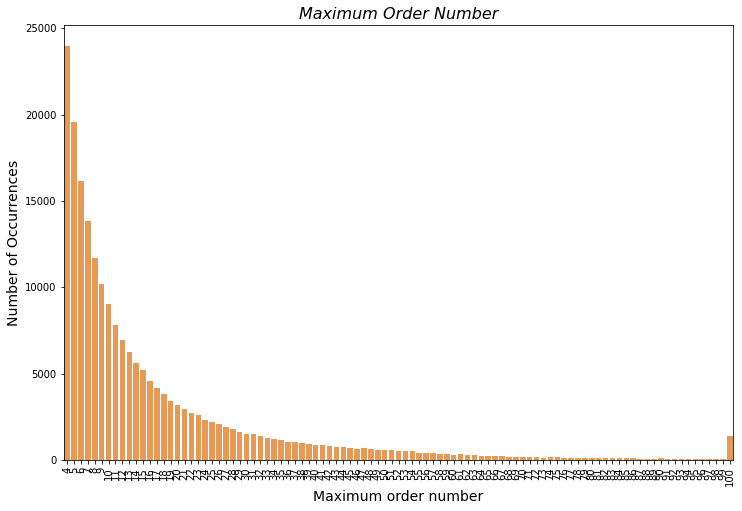

In [0]:
Order_Count = orders_df.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
Order_Count = Order_Count.order_number.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(Order_Count.index, Order_Count.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=14)
plt.xlabel('Maximum order number', fontsize=14)
plt.title('Maximum Order Number', fontsize=16, fontstyle='italic')
plt.xticks(rotation='vertical')
plt.show()

**The below plots helps us to analyze when people buy groceries online.**


---



---



***Order Count by Week Day***

---



---



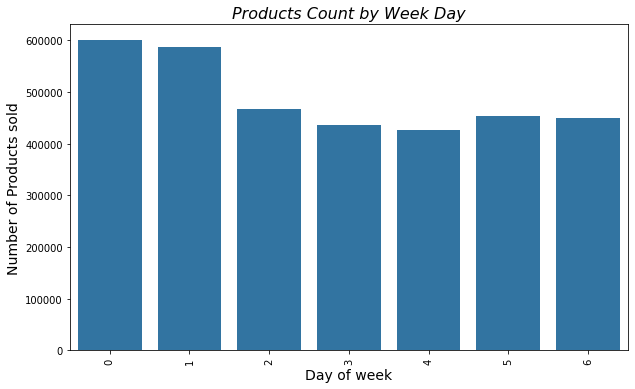

In [0]:
plt.figure(figsize=(10,6))
sns.countplot(x="order_dow", data=orders_df, color=color[0])
plt.ylabel('Number of Products sold', fontsize=14)
plt.xlabel('Day of week', fontsize=14)
plt.xticks(rotation='vertical')
plt.title('Products Count by Week Day', fontsize=16, fontstyle='italic')
plt.show()

**The orders are the higest on Saturday and Sunday while they are lowest on Wednesday.**

***Order Count by hour of the day***

---



---



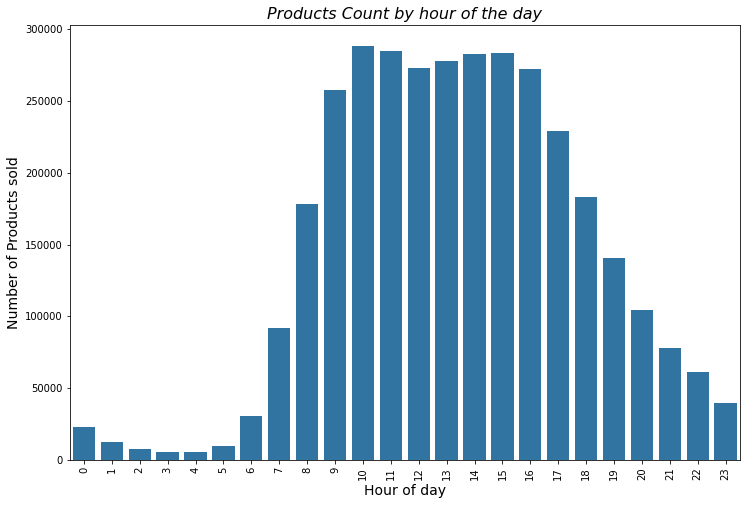

In [0]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=orders_df, color=color[0])
plt.ylabel('Number of Products sold', fontsize=14)
plt.xlabel('Hour of day', fontsize=14)
plt.title('Products Count by hour of the day', fontsize=16, fontstyle='italic')
plt.xticks(rotation='vertical')
plt.show()

**Frequency of Day of week Vs Hour of day**

---



---



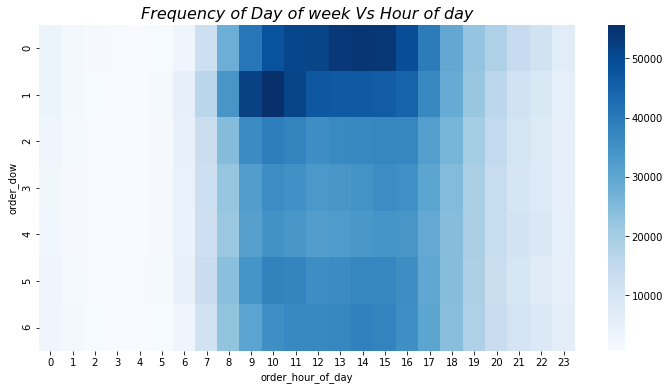

In [0]:
grouped_df = orders_df.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df, cmap="Blues")
plt.title("Frequency of Day of week Vs Hour of day", fontsize=16, fontstyle='italic')
plt.show()

***Saturday evenings and Sunday mornings are the prime time for orders***

***Frequency distribution by days since prior order***

---



---



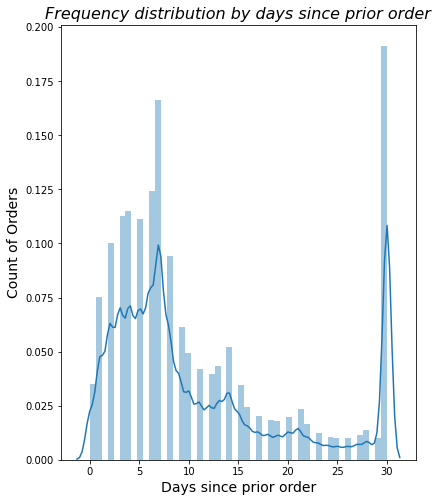

In [0]:
plt.figure(figsize=(14,8))
plt.subplot(121)
dist = sns.distplot(orders_df["days_since_prior_order"], color = color[0])
dist.set_xlabel("Days since prior order", fontsize=14)
dist.set_ylabel("Count of Orders", fontsize=14)
dist.set_title("Frequency distribution by days since prior order", fontsize=16, fontstyle='italic')

plt.show()


**Customers order once in every week or once in every month. This can be seen by looking at the peak for 7 days or at the peak for 30 days.**

**Few smaller peaks can be seen at 14, 21 and 28 days (weekly intervals)**

---



---




***Re-order ratio***


---



---



***Products reordered in prior and train set***


---



---



In [0]:
# percentage of re-orders in prior set #
prior = order_products_prior_df.reordered.sum() / order_products_prior_df.shape[0]
print("Percentage of reorders in prior set")
print(prior)

# percentage of re-orders in train set #
train = order_products_train_df.reordered.sum() / order_products_train_df.shape[0]
print("Percentage of reorders in train set")
print(train)

Percentage of reorders in prior set
0.5896974667922161
Percentage of reorders in train set
0.5985944127509629


***Department Reorder ratio***

---



---



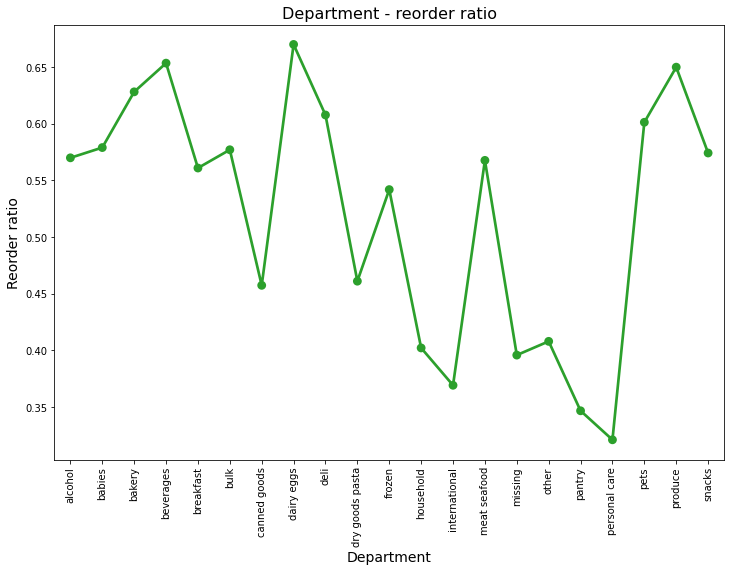

In [0]:
dept_df = order_products_prior_df.groupby(["department"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(dept_df['department'].values, dept_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=14)
plt.xlabel('Department', fontsize=14)
plt.title("Department - reorder ratio", fontsize=16)
plt.xticks(rotation='vertical')
plt.show()

***Add to cart - Reorder ratio***


---



---



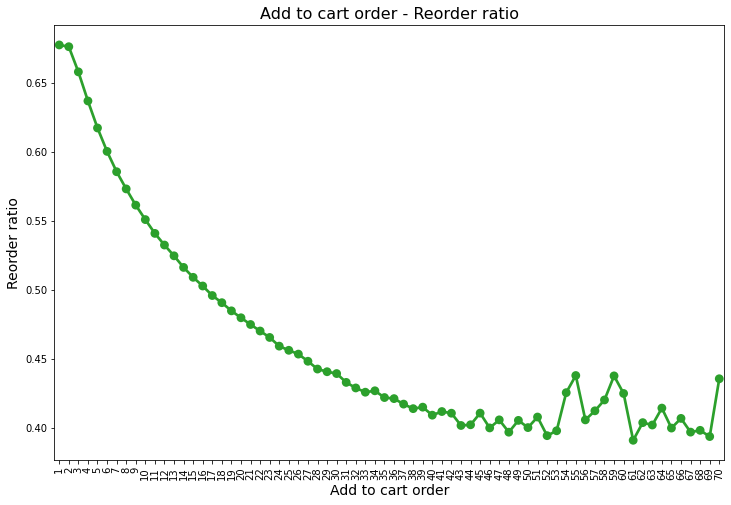

In [0]:
order_products_prior_df["add_to_cart_order_mod"] = order_products_prior_df["add_to_cart_order"].copy()
order_products_prior_df["add_to_cart_order_mod"].loc[order_products_prior_df["add_to_cart_order_mod"]>70] = 70
AddToCart_df = order_products_prior_df.groupby(["add_to_cart_order_mod"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(AddToCart_df['add_to_cart_order_mod'].values, AddToCart_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=14)
plt.xlabel('Add to cart order', fontsize=14)
plt.title("Add to cart order - Reorder ratio", fontsize=16)
plt.xticks(rotation='vertical')
plt.show()

***The products that are added to the cart first are more likely to be reordered again.***

---


***Reorder ratio by Time based variables:***

---



---



***Reorder ratio by day of week***

---



---



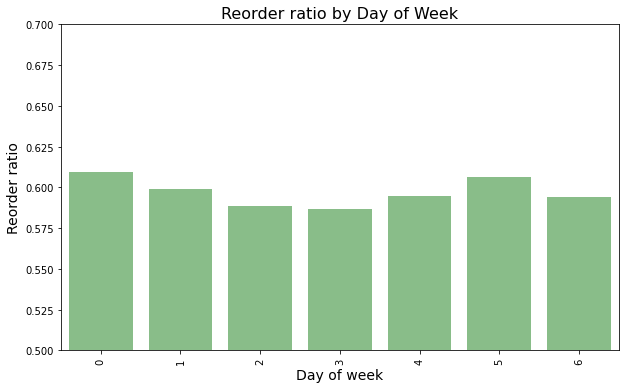

In [0]:
order_products_train_df = pd.merge(order_products_train_df, orders_df, on='order_id', how='left')
order_DOW_df = order_products_train_df.groupby(["order_dow"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(10,6))
sns.barplot(order_DOW_df['order_dow'].values, order_DOW_df['reordered'].values, alpha=0.6, color=color[2])
plt.ylabel('Reorder ratio', fontsize=14)
plt.xlabel('Day of week', fontsize=14)
plt.title("Reorder ratio by Day of Week", fontsize=16)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

***Reorder ratio by hour of the day***


---



---



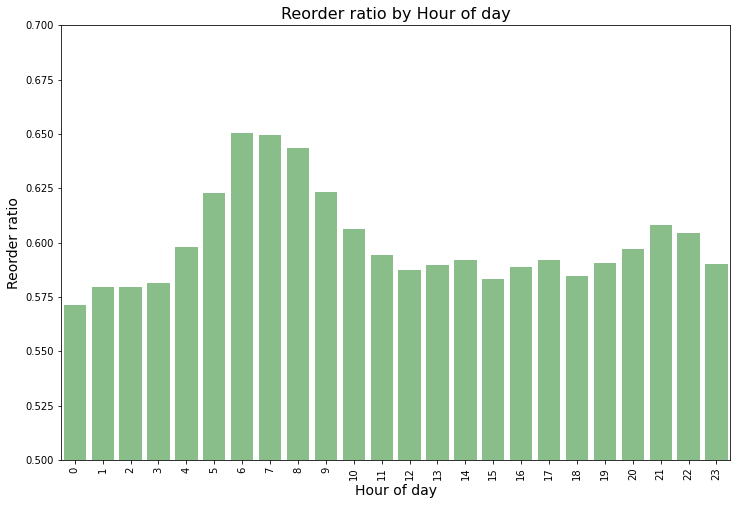

In [0]:
hour_hod_df = order_products_train_df.groupby(["order_hour_of_day"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(hour_hod_df['order_hour_of_day'].values, hour_hod_df['reordered'].values, alpha=0.6, color=color[2])
plt.ylabel('Reorder ratio', fontsize=14)
plt.xlabel('Hour of day', fontsize=14)
plt.title("Reorder ratio by Hour of day", fontsize=16)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

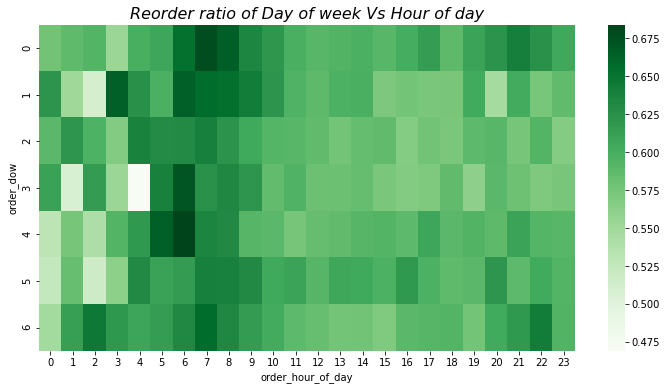

In [0]:
grouped_df = order_products_train_df.groupby(["order_dow", "order_hour_of_day"])["reordered"].aggregate("mean").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'reordered')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df, cmap = "Greens")
plt.title("Reorder ratio of Day of week Vs Hour of day", fontsize=16, fontstyle='italic')
plt.show()

***Reorder ratios are quite high during the early mornings compared to later half of the day.***